# Project: Finding Donors for CharityML

In this project we are going to create a machine learning model which predicts whether an individual earns more than $50k. We will then use these predicted values to send fliers to these indivduals in hopes of them donating to CharityML. The data I am using is from the 1994 US census.

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
# Downloading the data
train_data = pd.read_csv("census.csv") #Training data
test_data = pd.read_csv("test_census.csv") #Testing data

#train_data = pd.DataFrame(data=train_data)
#test_data = pd.DataFrame(data=test_data)

In [195]:
train_data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [196]:
num_attribs = ["age", "education-num",
               "capital-gain",
               "capital-loss",
               "hours-per-week"]

cat_attribs = ["workclass",
               "education_level",
               "marital-status",
               "occupation",
               "relationship",
               "race", "sex",
               "native-country"]

## Exploring the data

In [307]:
x = np.sum(train_data["income"]==">50K")
y = np.sum(train_data["income"]=="<=50K")

print("Number of records:", len(train_data["income"]))
print("Number of individuals with income >$50,000:", x)
print("Number of individuals with income <=$50,000:", y)
print("Percentage of individuals with income > $50,000", x/(x+y))

Number of records: 45222
Number of individuals with income >$50,000: 11208
Number of individuals with income <=$50,000: 34014
Percentage of individuals with income > $50,000 0.2478439697492371


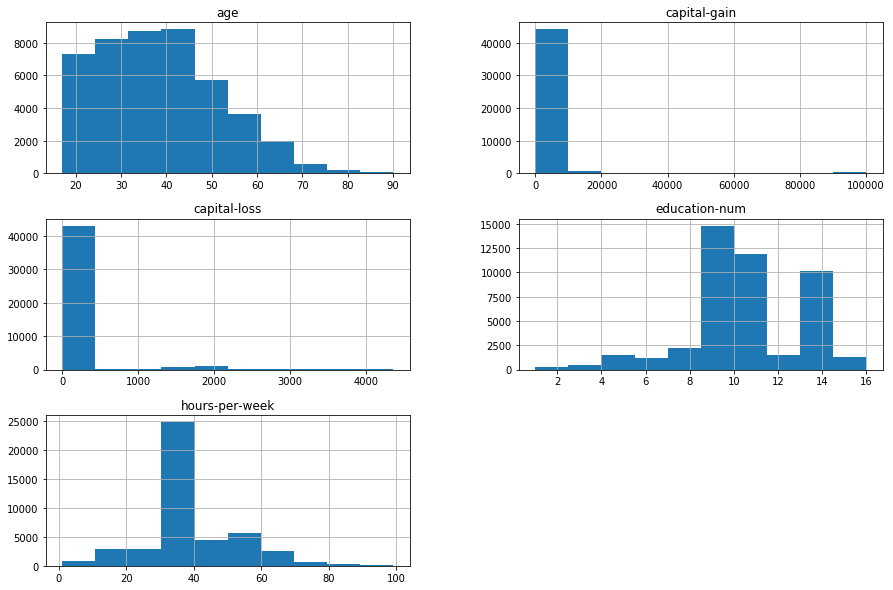

In [197]:
train_data.hist(bins=10, figsize=(15,10))
plt.show()

## Preparing the data for a model



In [198]:
labels = train_data["income"]
features = train_data.drop("income", axis=1)
features.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


In [199]:
train_data[num_attribs] = train_data[num_attribs].fillna(0.0)

In [200]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features[num_attribs] = scaler.fit_transform(train_data[num_attribs])

In [201]:
features.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.034201,State-gov,Bachelors,1.128753,Never-married,Adm-clerical,Not-in-family,White,Male,0.142888,-0.21878,-0.078120,United-States
1,0.866417,Self-emp-not-inc,Bachelors,1.128753,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146733,-0.21878,-2.326738,United-States
2,-0.041455,Private,HS-grad,-0.438122,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.146733,-0.21878,-0.078120,United-States
3,1.093385,Private,11th,-1.221559,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.146733,-0.21878,-0.078120,United-States
4,-0.798015,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.146733,-0.21878,-0.078120,Cuba


In [245]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
income_final = encoder.fit_transform(labels)
features_final = pd.get_dummies(features)

print(features_final.shape)

(45222, 103)


## Naive Predictor Performace

If we chose a model that always predicted an individual made more than $50,000, what would that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to 'accuracy' and 'fscore' to be used later.

In [310]:

accuracy = x/(x+y)
recall = 1
precision = accuracy

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = 2*precision*recall/(precision+recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.3972]


# Finding a suitable model:

In this section we are going to fit the dataset to a model and see which model performs best.

In [246]:
from sklearn.cross_validation import train_test_split

X_train, X_val, y_train, y_val = train_test_split(features_final, income_final, test_size=0.25, random_state=42)
#Making validation set as have another dataset for testing.

In [247]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, f1_score

scorer = make_scorer(accuracy_score)

Below I am defining a function which implements the model as well as finding the best hyperparameters for the model and plots the learning curve of the model.

In [292]:

def train_model(model,title, parameters=None):
    """This function fits the data to our model.
    Uses GridSearchCV to find the best parameters for each model.
    Implements the new parameters.
    Plots a learning curve to show how the model performs.
    Prints accuracy scores for train and Validation set.
    NOTE: Function takes longer to compute with more parameter values"""
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    print("Model training accuracy score before parameters:", accuracy_score(y_train,y_pred))
    print("Model validation accuracy score before parameters:", accuracy_score(y_pred_val, y_val))
    
    if parameters is not None:
        grid_obj = GridSearchCV(model, parameters, scoring=scorer)
        grid_fit = grid_obj.fit(X_train,y_train)
        best_clf = grid_fit.best_estimator_
        best_clf.fit(X_train,y_train)
        y_pred_gridsearch = best_clf.predict(X_train)
        y_pred_val_gridsearch = best_clf.predict(X_val)
        model = best_clf
        print("Model training accuracy score after parameters:", accuracy_score(y_pred_gridsearch, y_train))
        print("Model validation accuracy score after parameters:", accuracy_score(y_pred_val_gridsearch, y_val))
        print(best_clf)
    
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    fig = plt.figure(figsize=(7.5,5))
    plt.plot(train_scores_mean, label="Train Scores")
    plt.plot(val_scores_mean, label="Validation Scores")
    plt.xlabel("Training examples (Standard Devation)")
    plt.ylabel("Score")
    plt.suptitle("Learning curve for model: {}".format(title))
    plt.legend(loc="best")
    plt.show()
    

## Decision Tree Model

Model training accuracy score before parameters: 0.9729331289067107
Model validation accuracy score before parameters: 0.8157615425437821
Model training accuracy score after parameters: 0.8239768840665173
Model validation accuracy score after parameters: 0.8254908897930302
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


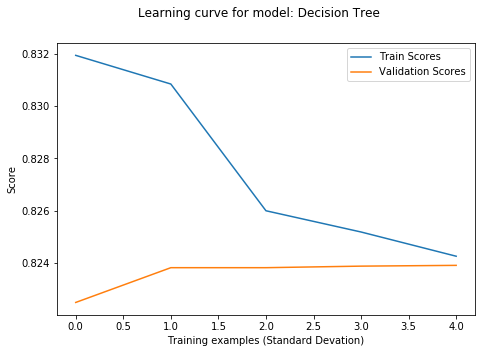

In [293]:
#Decison Tree
from sklearn.tree import DecisionTreeClassifier

tree_params = {"max_depth": [1,2],
              "min_samples_leaf": [1,3],
              "min_samples_split": [2,4]}

tree = DecisionTreeClassifier()
train_model(tree, "Decision Tree", tree_params)

This model looks strong. It seems to fit our data nicely and we have a high validation score. Let's use this to make a better model.

Model training accuracy score before parameters: 0.637250855053662
Model validation accuracy score before parameters: 0.644525030957014


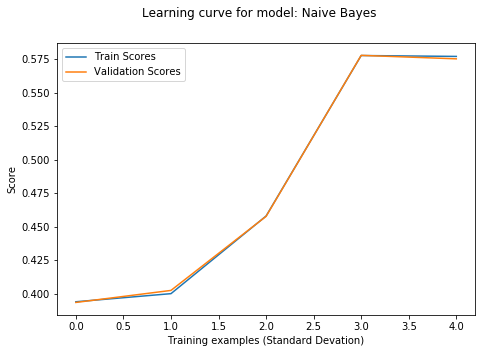

In [311]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

train_model(naive_bayes, "Naive Bayes")

This is a poor model for our dataset as we have a low score for the validation set.

Model training accuracy score before parameters: 0.8475350866847505
Model validation accuracy score before parameters: 0.8505218468070052


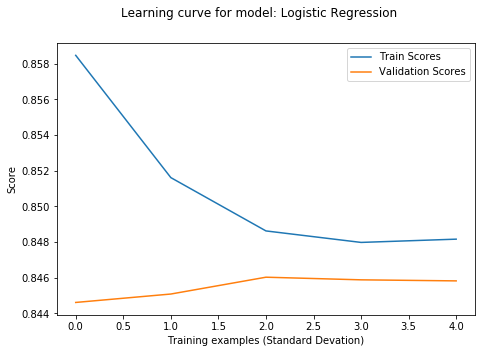

In [295]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()


train_model(log_reg, "Logistic Regression")

Model training accuracy score before parameters: 0.8566458308762825
Model validation accuracy score before parameters: 0.8606049885016805


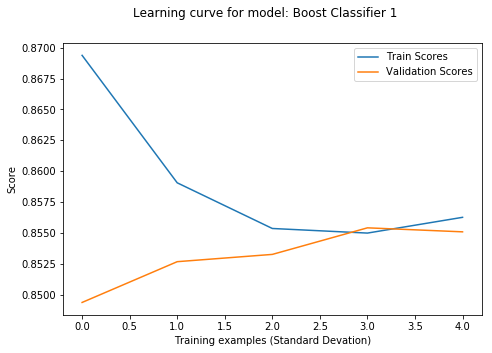

In [296]:
from sklearn.ensemble import AdaBoostClassifier


ada_boost1 = AdaBoostClassifier()


train_model(ada_boost1, "Boost Classifier 1")

This model performed well, lets see how it performs with the optimised hyperparameters found in the previous model.

Model training accuracy score before parameters: 0.8692652435428706
Model validation accuracy score before parameters: 0.8711303732531399


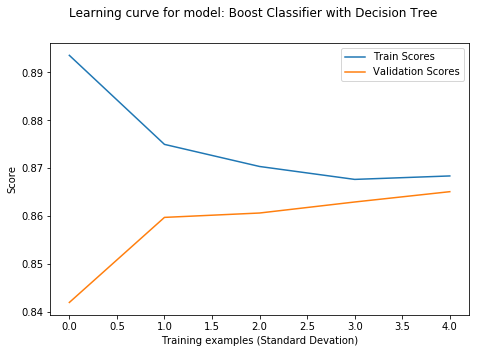

In [315]:
#Using the best_clf variable found using gridsearchcv in decision tree model.
ada_boost_tree = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))

train_model(ada_boost_tree, "Boost Classifier with Decision Tree")

This looks to be our best model yet as it doesn't overfit our model and we are getting a high validation score. Let's use this!

## How the model works:

This is a Decision tree model. It works by classing each feature by its value and deciding which bin it should go into for classification. For example age in this dataset is important as your income generally increases with age, so we make a simple decision tree stating if your age>40 you'll be classified as having an income >=50K. This model does the same thing but in a more complex manner.

## Feature importance:

Let's take a look at the most important features for our Decision Tree model.


From this I conclude that the most relevant features are:

    1) Education Level
    2) age
    3) Marital Status
    4) Capital gain
    5) Work Class 